In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd



In [3]:
# Getting CSVs into DataFrames
death_df=pd.read_csv("Causes of Death.csv")
heart_df=pd.read_csv("Heart Disease Data.csv")
# Looking at each data set
display(death_df.head())
heart_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [4]:
#Dropping 113 Cause Name, will use Cause Name column for analysis
death_df=death_df.drop("113 Cause Name",axis=1)
death_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,"169,936",49.4
1,2017,Unintentional injuries,Alabama,"2,703",53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,"4,184",56.2
4,2017,Unintentional injuries,Arkansas,"1,625",51.8


In [5]:
# Filtering to All Causes because want overall Death Rate
allcauses_df=death_df[death_df["Cause Name"]=="All causes"]
allcauses_df


,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
52,2017,All causes,United States,"2,813,503",731.9
53,2017,All causes,Alabama,"53,238",917.7
54,2017,All causes,Alaska,"4,411",708.8
55,2017,All causes,Arizona,"57,758",678.5
56,2017,All causes,Arkansas,"32,588",900.1
...,...,...,...,...,...
10395,1999,All causes,Virginia,"55,320",889.6
10396,1999,All causes,Washington,"43,865",815.1
10397,1999,All causes,West Virginia,"21,049","1,012.30"
10398,1999,All causes,Wisconsin,"46,672",831.5


In [6]:
#Filtering to Only State Data
droprows=allcauses_df["State"] != "United States"
filtered_df=allcauses_df[droprows]
filtered_df

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
53,2017,All causes,Alabama,"53,238",917.7
54,2017,All causes,Alaska,"4,411",708.8
55,2017,All causes,Arizona,"57,758",678.5
56,2017,All causes,Arkansas,"32,588",900.1
57,2017,All causes,California,"268,189",618.7
...,...,...,...,...,...
10395,1999,All causes,Virginia,"55,320",889.6
10396,1999,All causes,Washington,"43,865",815.1
10397,1999,All causes,West Virginia,"21,049","1,012.30"
10398,1999,All causes,Wisconsin,"46,672",831.5


C:\Users\ssark\AppData\Local\Temp\ipykernel_23372\473975584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Age-adjusted Death Rate"]=pd.to_numeric(filtered_df['Age-adjusted Death Rate'], errors='coerce')


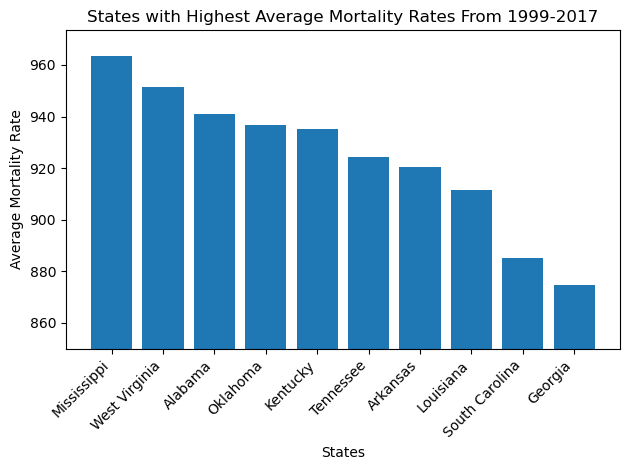

In [7]:
# Making death rate column numeric
filtered_df["Age-adjusted Death Rate"]=pd.to_numeric(filtered_df['Age-adjusted Death Rate'], errors='coerce')
# Grouping for Bar Chart
avg_mortality=filtered_df.groupby('State')['Age-adjusted Death Rate'].mean().sort_values(ascending=False)
# Bar Chart of Average Mortality Rates
plt.bar(avg_mortality.head(10).index,avg_mortality.head(10))
plt.title('States with Highest Average Mortality Rates From 1999-2017')
plt.xlabel('States')
plt.ylabel('Average Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(850,max(avg_mortality)+10)
plt.tight_layout()
plt.show()

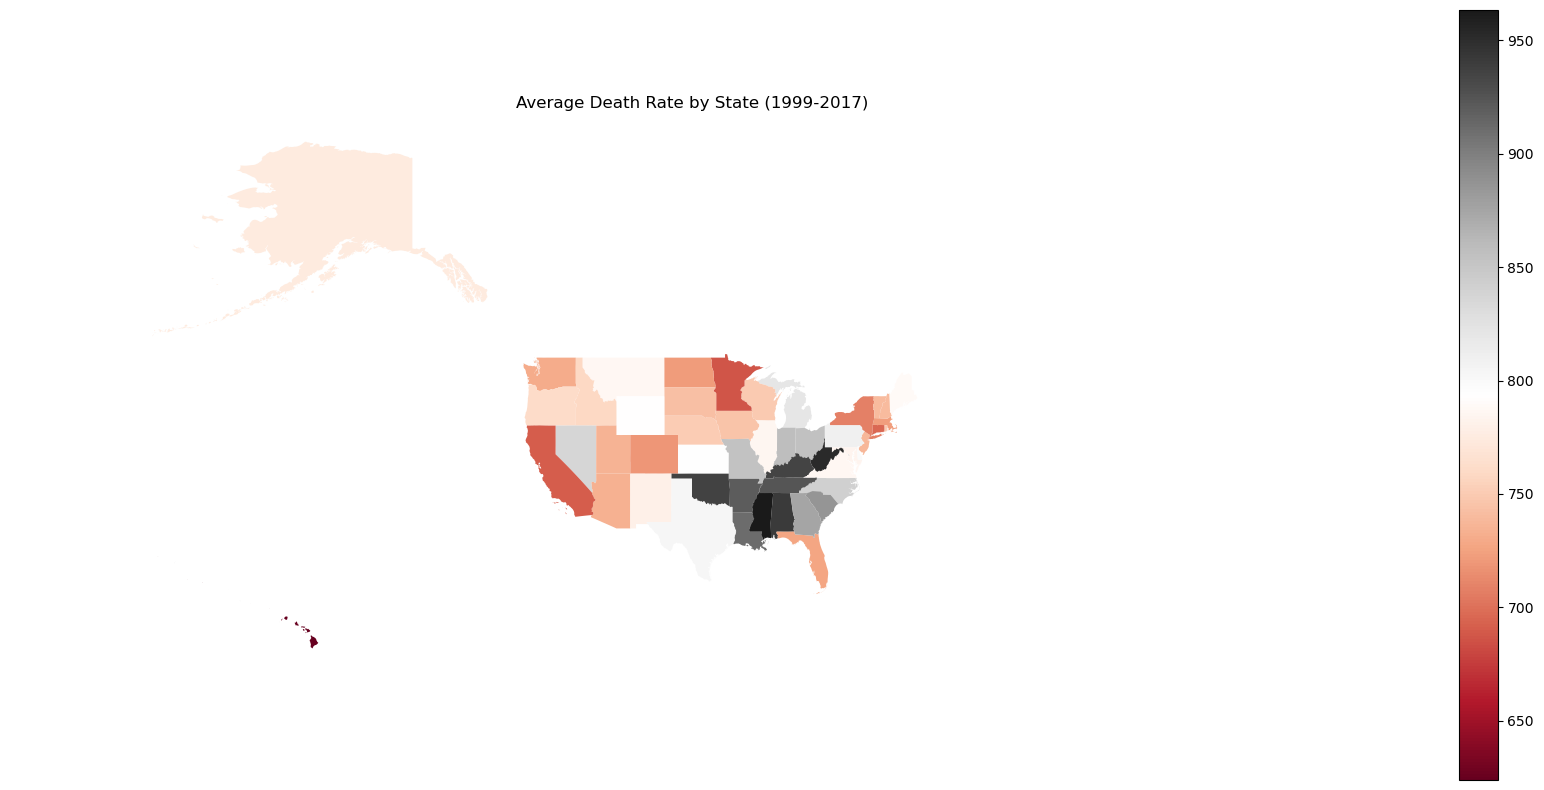

In [8]:
# Getting US Heat Map with help from Google Gemini
us_map = gpd.read_file('gz_2010_us_040_00_500k.json')
merged_map = us_map.merge(avg_mortality.reset_index(), left_on='NAME', right_on='State')
cmap = plt.cm.RdGy
fig, ax = plt.subplots(figsize=(22, 10))
merged_map.plot(column='Age-adjusted Death Rate', ax=ax, cmap=cmap, legend=True)
plt.title('Average Death Rate by State (1999-2017)')
ax.set_axis_off()
plt.xlim(-200,0)

# Show the plot
plt.show()

In [9]:
heartdisease_df=death_df[death_df["Cause Name"]=="Heart disease"]
heartdisease_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,Heart disease,United States,"647,457",165
313,2017,Heart disease,Alabama,"13,110",223.2
314,2017,Heart disease,Alaska,814,135
315,2017,Heart disease,Arizona,"12,398",141.9
316,2017,Heart disease,Arkansas,"8,270",223.8


In [10]:
droprows2=heartdisease_df["State"] != "United States"
heartfiltered_df=heartdisease_df[droprows2]
heartfiltered_df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
313,2017,Heart disease,Alabama,"13,110",223.2
314,2017,Heart disease,Alaska,814,135
315,2017,Heart disease,Arizona,"12,398",141.9
316,2017,Heart disease,Arkansas,"8,270",223.8
317,2017,Heart disease,California,"62,797",142.9


C:\Users\ssark\AppData\Local\Temp\ipykernel_23372\4212709129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartfiltered_df["Age-adjusted Death Rate"]=pd.to_numeric(heartfiltered_df['Age-adjusted Death Rate'], errors='coerce')


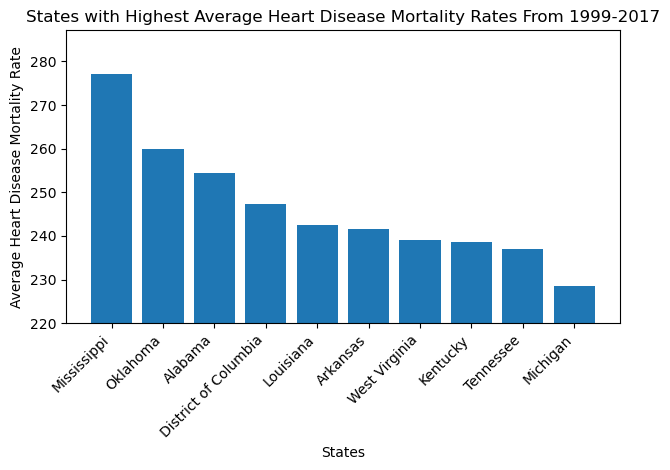

In [11]:
# Making death rate column numeric
heartfiltered_df["Age-adjusted Death Rate"]=pd.to_numeric(heartfiltered_df['Age-adjusted Death Rate'], errors='coerce')
# Grouping for Bar Chart
heart_mortality =heartfiltered_df.groupby('State')['Age-adjusted Death Rate'].mean().sort_values(ascending=False)
# Bar Chart of Average Heart Attack Mortality Rates
plt.bar(heart_mortality.head(10).index,heart_mortality.head(10))
plt.title('States with Highest Average Heart Disease Mortality Rates From 1999-2017')
plt.xlabel('States')
plt.ylabel('Average Heart Disease Mortality Rate')
plt.xticks(rotation=45, ha='right')
plt.ylim(220,max(heart_mortality)+10)
plt.tight_layout()
plt.show()

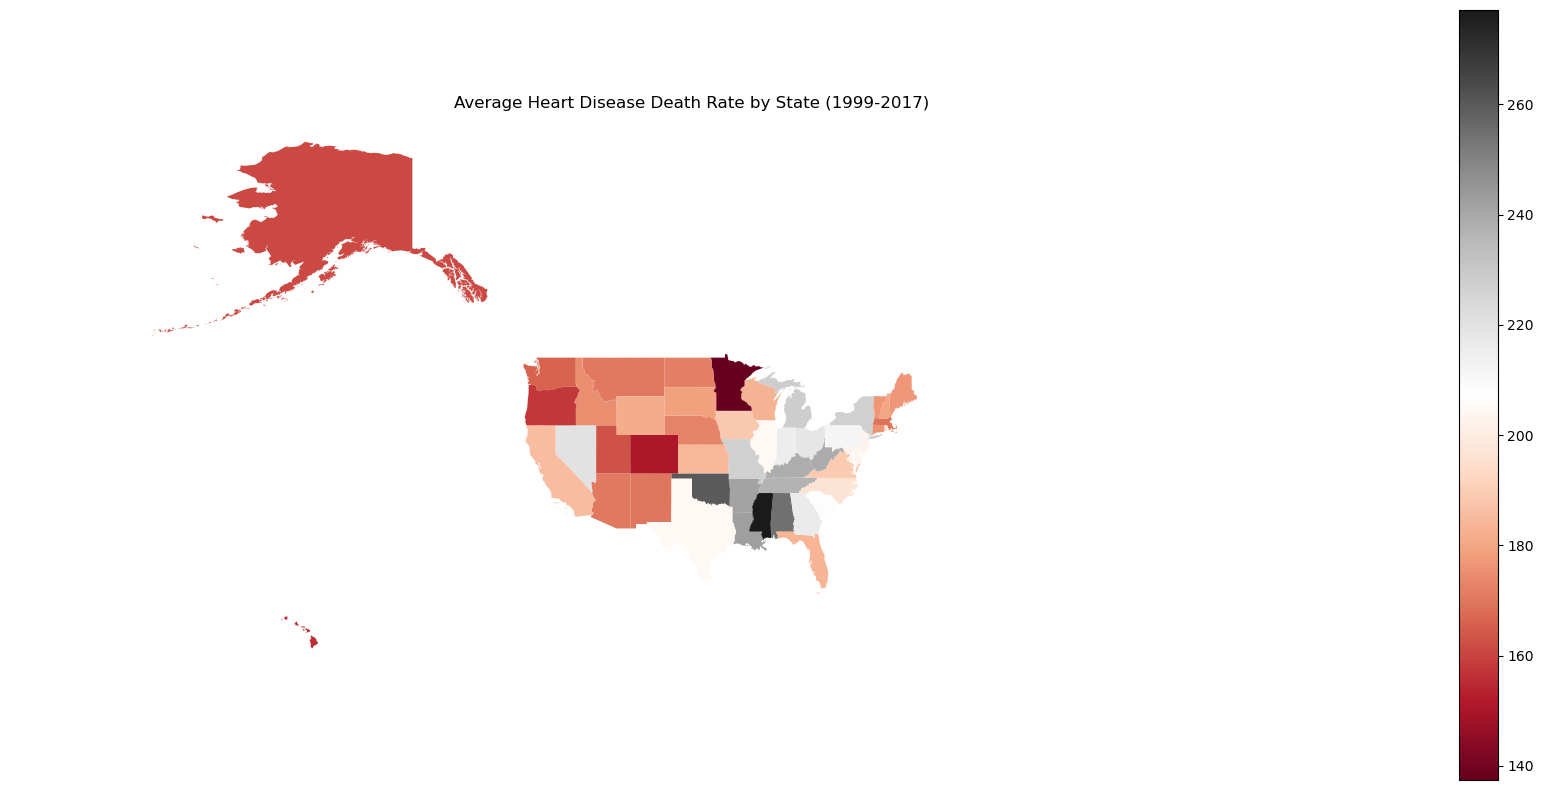

In [12]:
merged_map = us_map.merge(heart_mortality.reset_index(), left_on='NAME', right_on='State')
cmap = plt.cm.RdGy
fig, ax = plt.subplots(figsize=(22, 10))
merged_map.plot(column='Age-adjusted Death Rate', ax=ax, cmap=cmap, legend=True)
plt.title('Average Heart Disease Death Rate by State (1999-2017)')
ax.set_axis_off()
plt.xlim(-200,0)

# Show the plot
plt.show()